In [317]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from collections import OrderedDict
from math import isnan
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [242]:
# Read the player database into an array of dictionaries
players = []
with open('playerDB.csv', mode='r') as player_csv:
    player_reader = csv.DictReader(player_csv)
    line_count = 0
    for row in player_reader:
        players.append(dict(row))

# Read the draft database into an array of dictionaries
draftPicks = []
with open('draftDB.csv', mode='r') as draft_csv:
    draft_reader = csv.DictReader(draft_csv)
    line_count = 0
    for row in draft_reader:
        draftPicks.append(dict(row))

In [243]:
player_df = pd.read_csv('playerDB.csv')
draft_df = pd.read_csv('draftDB.csv')

In [244]:
player_df

,Season,Rk,Player,urlID,Pos,Age,Tm,G,MP,PER,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1979-80,1,Kareem Abdul-Jabbar*,abdulka01,C,32,LAL,82,3143,25.3,...,15.7,24.1,9.5,5.3,14.8,0.227,4.0,2.7,6.7,6.8
1,1979-80,2,Tom Abernethy,abernto01,PF,25,GSW,67,1222,11.0,...,9.9,13.3,1.2,0.8,2.0,0.080,-1.5,-0.1,-1.6,0.1
2,1979-80,3,Alvan Adams,adamsal01,C,25,PHO,75,2168,19.2,...,18.2,21.9,3.1,3.9,7.0,0.155,1.6,2.8,4.4,3.5
3,1979-80,4,Tiny Archibald*,architi01,PG,31,BOS,80,2864,15.3,...,19.7,17.0,5.9,2.9,8.9,0.148,1.1,-1.1,0.0,1.5
4,1979-80,5,Dennis Awtrey,awtrede01,C,31,CHI,26,560,7.4,...,24.8,7.9,0.1,0.5,0.6,0.053,-2.9,1.5,-1.4,0.1
5,1979-80,6,Gus Bailey,bailegu01,SG,28,WSB,20,180,9.3,...,21.3,11.3,0.0,0.2,0.2,0.043,-3.7,1.3,-2.4,0.0
6,1979-80,7,James Bailey,baileja01,PF,22,SEA,67,726,12.3,...,20.0,21.4,-0.4,1.4,1.0,0.063,-4.5,0.9,-3.5,-0.3
7,1979-80,8,Greg Ballard,ballagr01,SF,25,WSB,82,2438,18.1,...,10.0,21.6,4.1,2.8,6.9,0.136,2.0,0.5,2.5,2.7
8,1979-80,9,Mike Bantom,bantomi01,SF,28,IND,77,2330,13.7,...,18.2,17.3,2.1,1.9,3.9,0.081,0.1,0.2,0.3,1.4
9,1979-80,10,Marvin Barnes,barnema01,PF,27,SDC,20,287,8.2,...,19.5,12.8,-0.1,0.2,0.1,0.019,-3.2,0.1,-3.1,-0.1


In [246]:
draft_df

,yearDraft,numberPickOverall,numberRound,numberRoundPick,namePlayer,slugTeam,nameOrganizationFrom,typeOrganizationFrom,idPlayer,idTeam,nameTeam,basketball_reference_url
0,2019,1,1,1,Zion Williamson,NOP,Duke,College/University,1629627,1610612740,New Orleans Pelicans,/players/w/willizi01.html
1,2019,2,1,2,Ja Morant,MEM,Murray State,College/University,1629630,1610612763,Memphis Grizzlies,/players/m/moranja01.html
2,2019,3,1,3,RJ Barrett,NYK,Duke,College/University,1629628,1610612752,New York Knicks,/players/b/barrerj01.html
3,2019,4,1,4,De'Andre Hunter,LAL,Virginia,College/University,1629631,1610612747,Los Angeles Lakers,/players/h/huntede01.html
4,2019,5,1,5,Darius Garland,CLE,Vanderbilt,College/University,1629636,1610612739,Cleveland Cavaliers,/players/g/garlada01.html
5,2019,6,1,6,Jarrett Culver,PHX,Texas Tech,College/University,1629633,1610612756,Phoenix Suns,/players/c/culveja01.html
6,2019,7,1,7,Coby White,CHI,North Carolina,College/University,1629632,1610612741,Chicago Bulls,/players/w/whiteco01.html
7,2019,8,1,8,Jaxson Hayes,ATL,Texas,College/University,1629637,1610612737,Atlanta Hawks,/players/h/hayesja02.html
8,2019,9,1,9,Rui Hachimura,WAS,Gonzaga,College/University,1629060,1610612764,Washington Wizards,/players/h/hachiru01.html
9,2019,10,1,10,Cam Reddish,ATL,Duke,College/University,1629629,1610612737,Atlanta Hawks,/players/r/reddica01.html


In [247]:
def parse_url(x):
    try:
        id = x.split('/')[3].strip('.html')
        return id
    except:
        return ""


draft_df['urlID'] = draft_df['basketball_reference_url'].apply(lambda x: parse_url(x))
draft_df = draft_df.loc[draft_df['urlID'] != ""]

In [248]:
player_dict = player_df.groupby('urlID').apply(lambda player: player.to_dict(orient='list')).to_dict()

In [249]:
player_df.drop(columns=['Tm'], inplace=True)

In [250]:
def get_average_feature(player_id, feature):
    return np.mean(player_dict[player_id][feature])
    
# average feature score per draft pick
avg_feature_per_pick = {feature: {x: [] for x in [i+1 for i in range(60)]} for feature in player_df.columns[5:]}
for feature in player_df.columns[5:]:
    for num_pick, player_id in zip(draft_df['numberPickOverall'], draft_df['urlID']):
        if player_id != "" and int(num_pick) <= 60:
            try:
                avg_feature_per_pick[feature][num_pick].append(get_average_feature(player_id, feature))
            except:
                continue

In [254]:
d = pd.DataFrame(data=[i for i in range(1, 61)], columns=['draft_pick'])
for feature in player_df.columns[5:]:
    d[feature] = d['draft_pick'].apply(lambda x: np.mean(avg_feature_per_pick[feature][x]))
    
# Compute the correlation matrix
corr = d.corr()
pd.DataFrame(corr['draft_pick'])

,draft_pick
draft_pick,1.000000
Age,-0.390265
G,-0.933833
MP,-0.917017
PER,-0.726477
TS%,-0.555953
3PAr,0.013047
FTr,0.133371
ORB%,0.173850
DRB%,-0.361693


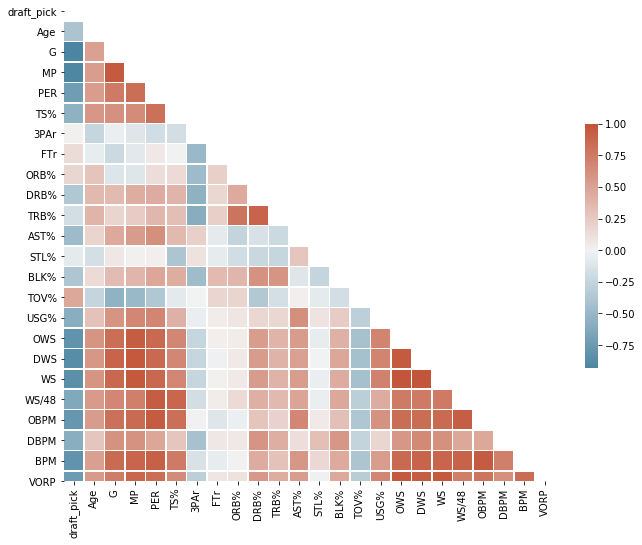

In [389]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

f.savefig('corrmatrix.png')

In [253]:
subset_df = player_df[['WS', 'BPM', 'VORP', 'PER', 'MP', 'G']]
subset_df.head()

,WS,BPM,VORP,PER,MP,G
0,14.8,6.7,6.8,25.3,3143,82
1,2.0,-1.6,0.1,11.0,1222,67
2,7.0,4.4,3.5,19.2,2168,75
3,8.9,0.0,1.5,15.3,2864,80
4,0.6,-1.4,0.1,7.4,560,26


/Users/sejaldua/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


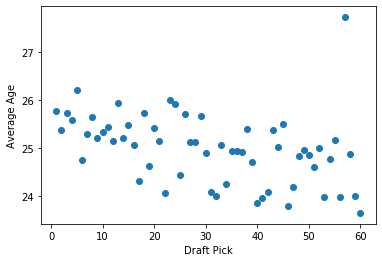

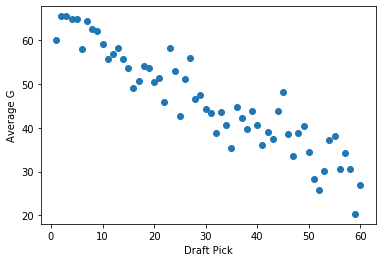

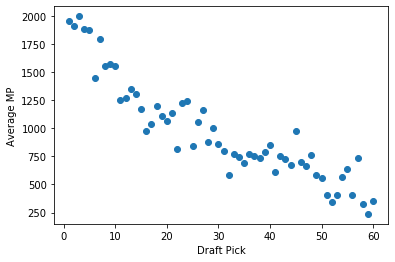

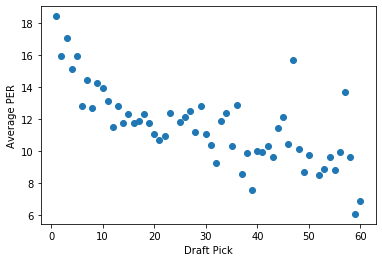

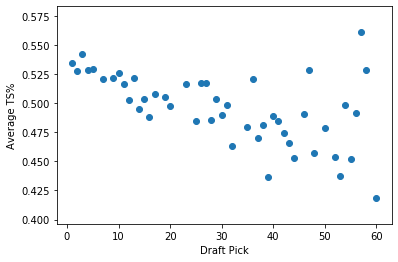

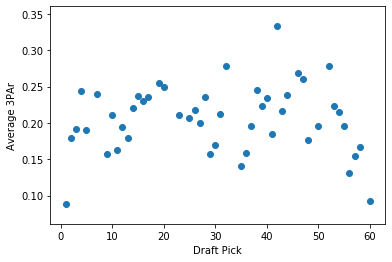

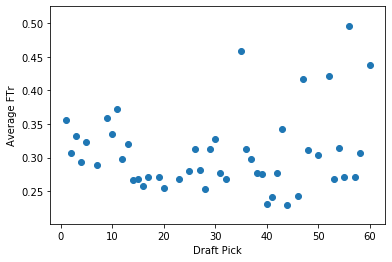

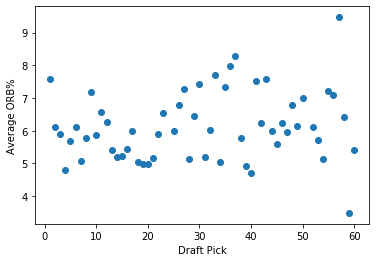

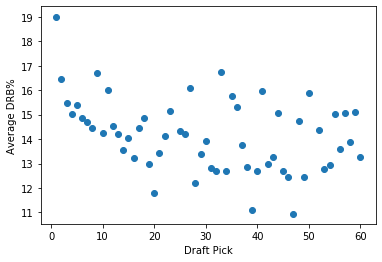

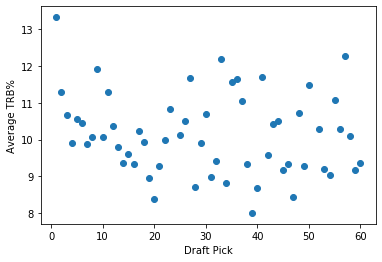

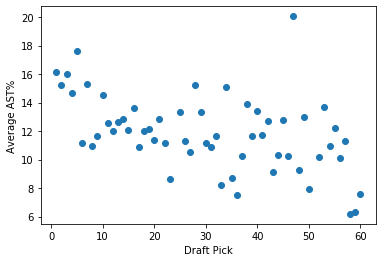

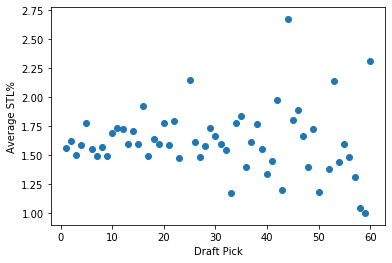

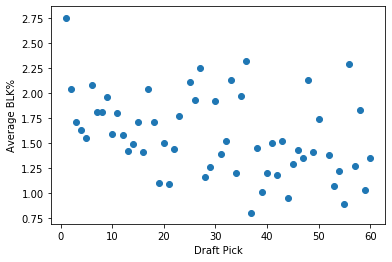

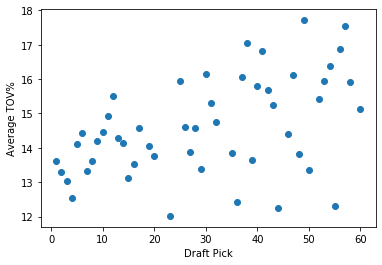

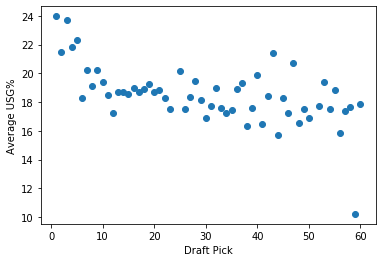

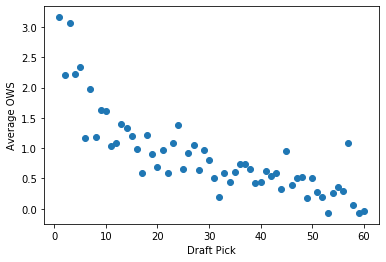

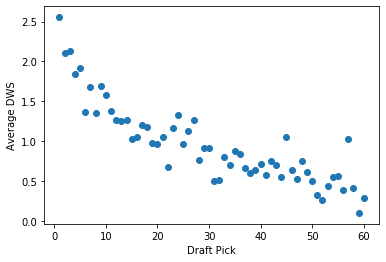

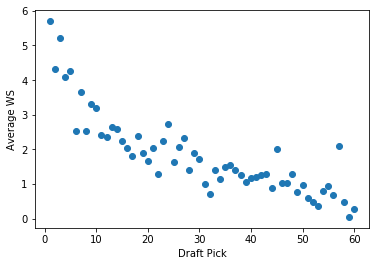

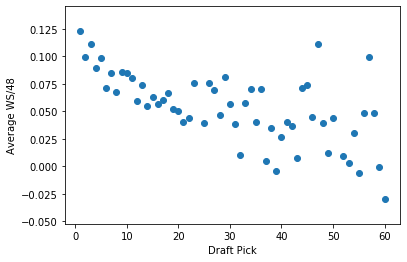

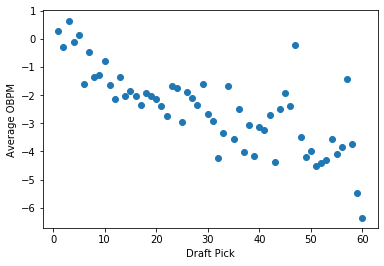

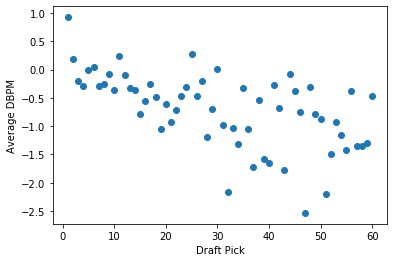

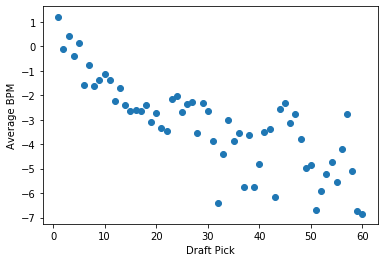

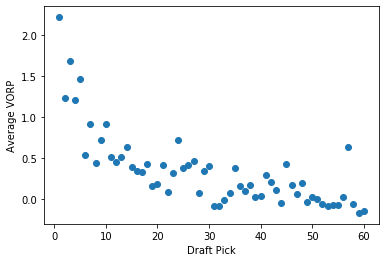

In [258]:
for feature in avg_feature_per_pick.keys():
    fig = plt.figure();
    plt.scatter(list(avg_feature_per_pick[feature].keys()), [np.mean(avg_feature_per_pick[feature][i+1]) for i in range(len(avg_feature_per_pick[feature]))]);
    plt.xlabel('Draft Pick');
    plt.ylabel('Average ' + feature);
    fig.savefig("draft_pick_correlations/" + str(feature).replace("/", "_") + ".png");

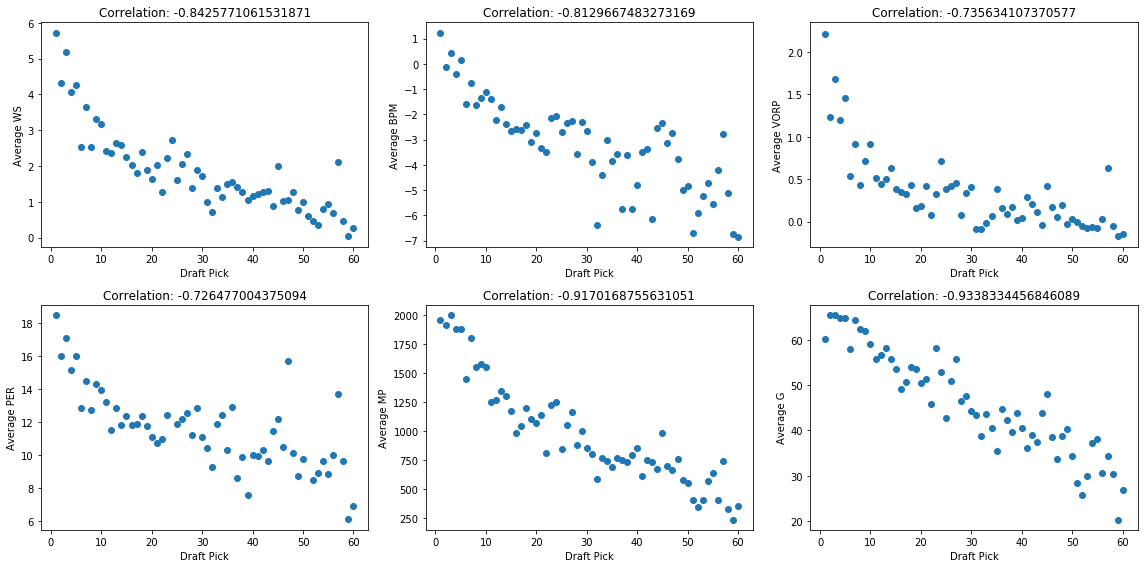

In [259]:
fig = plt.figure(figsize=(16, 8));
for i, feature in enumerate(subset_df.columns):
    plt.subplot(2, 3, i+1)
    plt.scatter(list(avg_feature_per_pick[feature].keys()), [np.mean(avg_feature_per_pick[feature][i+1]) for i in range(len(avg_feature_per_pick[feature]))]);
    plt.xlabel('Draft Pick');
    plt.ylabel('Average ' + feature);
    plt.title("Correlation: " + str(corr['draft_pick'][feature]))

plt.tight_layout()
fig.savefig("feature_correlations.png")


# Linear Regression

In [305]:
X_df = pd.DataFrame(columns=['playerID', 'name', *list(subset_df.columns), 'y_true'])
for num_pick, player_id in zip(draft_df['numberPickOverall'], draft_df['urlID']):
    player = {}
    for feature in subset_df.columns:
        if player_id != "" and int(num_pick) <= 60:
            try:
                player[feature] = get_average_feature(player_id, feature)
            except:
                player = {}
                break
    if player == {}:
        continue
    
    player['playerID'] = player_id
    player['name'] = player_dict[player_id]['Player'][0]
    player['y_true'] = int(num_pick)
    X_df = X_df.append(player, ignore_index=True)
    
X_df['y_true'] = X_df['y_true'].apply(lambda x: int(x))
X_df.dropna(axis=0, how='any', thresh= None, subset=None, inplace=True)
X_df.insert(len(X_df.columns)-1, 'const', [float(1) for i in range(len(X_df))])
X_df

,playerID,name,WS,BPM,VORP,PER,MP,G,const,y_true
0,aytonde01,Deandre Ayton,5.800000,0.200000,1.200000,20.500000,2183.000000,71.000000,1.0,1
1,baglema01,Marvin Bagley,3.600000,-1.800000,0.100000,18.900000,1567.000000,62.000000,1.0,2
2,doncilu01,Luka Don?i?,4.900000,4.100000,3.600000,19.600000,2318.000000,72.000000,1.0,3
3,jacksja02,Jaren Jackson,3.300000,0.100000,0.800000,16.400000,1515.000000,58.000000,1.0,4
4,youngtr01,Trae Young,3.300000,-1.100000,0.600000,17.000000,2503.000000,81.000000,1.0,5
5,bambamo01,Mo Bamba,1.700000,-0.200000,0.400000,14.900000,766.000000,47.000000,1.0,6
6,cartewe01,Wendell Carter,1.900000,-0.500000,0.400000,15.200000,1110.000000,44.000000,1.0,7
7,sextoco01,Collin Sexton,-0.600000,-5.200000,-2.100000,12.000000,2605.000000,82.000000,1.0,8
8,knoxke01,Kevin Knox,-1.300000,-6.000000,-2.200000,8.700000,2158.000000,75.000000,1.0,9
9,bridgmi01,Mikal Bridges,2.900000,-0.200000,1.100000,10.800000,2417.000000,82.000000,1.0,10


In [306]:
X = X_df.iloc[:,2:-1].values
y = X_df['y_true'].values

# print(X, y)
reg = LinearRegression()
reg.fit(X, y)
print(reg.coef_)
print(reg.intercept_)

[ 0.47383869  0.34900974  0.4161244  -0.34534496 -0.01488167  0.04362553
  0.        ]
43.72412162305962


In [307]:
model = sm.OLS(X_df['y_true'], X_df.iloc[:,2:-1])
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 y_true   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     85.45
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           1.88e-88
Time:                        23:24:46   Log-Likelihood:                -4605.9
No. Observations:                1146   AIC:                             9226.
Df Residuals:                    1139   BIC:                             9261.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
WS             0.4738      0.694      0.682      0.495      -0.888       1.836
BPM            0.3490      0.219      1.596      0.111      -0.080       0.778
VORP           0.4161      1.228      0.339      0.735      -1.994       2.826
PER           -0.3453      0.140     -2.466      0.014      -0.620      -0.071
MP            -0.0149      0.002     -8.731      0.000      -0.018      -0.012
G              0.0436      0.054      0.806      0.420      -0.063       0.150
const         43.7241      3.051     14.330      0.000      37.738      49.711
==============================================================================
Omnibus:                       39.351   Durbin-Watson:                   0.816
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.716
Skew:                           0.351   Prob(JB):                     4.77e-08
Kurtosis:                       2.539   Cond. No.                     1.02e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [308]:
X_df['y_pred'] = results.predict(X)
X_df = X_df.reset_index(drop=True)
X_df

,playerID,name,WS,BPM,VORP,PER,MP,G,const,y_true,y_pred
0,aytonde01,Deandre Ayton,5.800000,0.200000,1.200000,20.500000,2183.000000,71.000000,1.0,1,10.572698
1,baglema01,Marvin Bagley,3.600000,-1.800000,0.100000,18.900000,1567.000000,62.000000,1.0,2,17.701526
2,doncilu01,Luka Don?i?,4.900000,4.100000,3.600000,19.600000,2318.000000,72.000000,1.0,3,10.851490
3,jacksja02,Jaren Jackson,3.300000,0.100000,0.800000,16.400000,1515.000000,58.000000,1.0,4,19.976487
4,youngtr01,Trae Young,3.300000,-1.100000,0.600000,17.000000,2503.000000,81.000000,1.0,5,5.567543
5,bambamo01,Mo Bamba,1.700000,-0.200000,0.400000,14.900000,766.000000,47.000000,1.0,6,30.131698
6,cartewe01,Wendell Carter,1.900000,-0.500000,0.400000,15.200000,1110.000000,44.000000,1.0,7,24.767989
7,sextoco01,Collin Sexton,-0.600000,-5.200000,-2.100000,12.000000,2605.000000,82.000000,1.0,8,1.417516
8,knoxke01,Kevin Knox,-1.300000,-6.000000,-2.200000,8.700000,2158.000000,75.000000,1.0,9,8.251374
9,bridgmi01,Mikal Bridges,2.900000,-0.200000,1.100000,10.800000,2417.000000,82.000000,1.0,10,9.364766


In [406]:
pick_dict = {i: [] for i in range(1, 61)}
for i in range(len(X_df)):
    pick_dict[X_df['y_true'][i]].append(X_df['y_pred'][i])
# print(pick_dict)
    
draft_dict = {i: np.mean(pick_dict[i]) for i in pick_dict.keys()}
worst = draft_dict[60] + 1
ynew = {x: worst - draft_dict[x] for x in draft_dict.keys()}
print(ynew)

{1: 21.014542660039766, 2: 20.799527462090303, 3: 21.635917228131078, 4: 20.30503262283256, 5: 20.115753465866806, 6: 14.828099353769922, 7: 19.279676595613424, 8: 16.16457936126376, 9: 16.49388789048651, 10: 16.042719132243306, 11: 12.029133703893908, 12: 12.034389236576938, 13: 13.257413678005495, 14: 12.593733694720669, 15: 11.235805933747521, 16: 8.512420777458104, 17: 9.500323281853003, 18: 11.526933589785276, 19: 10.487162934876373, 20: 9.81356999445137, 21: 10.57180992633226, 22: 6.684479977977102, 23: 11.71626692898911, 24: 12.456817530482144, 25: 7.017270359477177, 26: 9.496854783616929, 27: 10.929870180143674, 28: 7.680050813156679, 29: 9.224526455535731, 30: 6.800128750827319, 31: 6.698344213040389, 32: 4.3130648427242235, 33: 6.73781392741984, 34: 6.256201061712588, 35: 5.019871139150524, 36: 6.612523182162402, 37: 5.840179104951442, 38: 5.436664042713513, 39: 6.175844211931388, 40: 7.633753308938587, 41: 3.7304909546038587, 42: 5.760746739001814, 43: 6.251506623552338, 44:

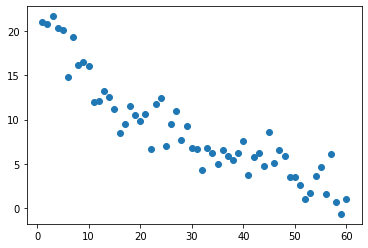

In [407]:
true_picks = list(ynew.keys())
est_picks = list(ynew.values())
plt.scatter(true_picks, est_picks)

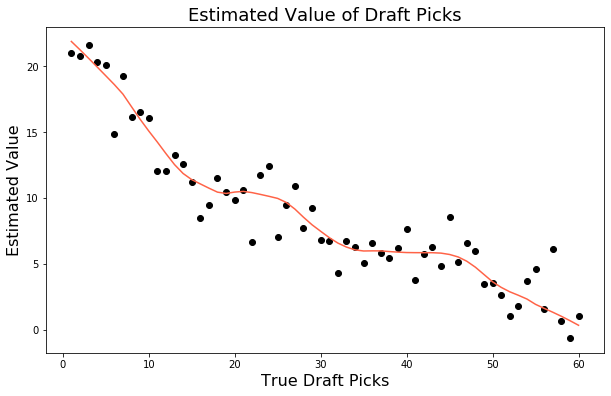

{1: 21.89049875704587, 2: 21.260990672663116, 3: 20.612707514997908, 4: 19.95279146855855, 5: 19.28631421933996, 6: 18.6145249156371, 7: 17.889491916659075, 8: 16.929366242815053, 9: 15.977361881933772, 10: 15.089285438138239, 11: 14.24811202615428, 12: 13.373316523875575, 13: 12.534733710608654, 14: 11.857737206246474, 15: 11.392985028768464, 16: 11.066533877118918, 17: 10.744630207541755, 18: 10.440210720634699, 19: 10.341201821869943, 20: 10.44569579051804, 21: 10.498918609976483, 22: 10.406107940049697, 23: 10.267746450492904, 24: 10.1217000883914, 25: 9.964316509499616, 26: 9.659381696346028, 27: 9.155589503670097, 28: 8.53643525790357, 29: 7.959148802189338, 30: 7.466724976944517, 31: 6.985437510504275, 32: 6.571871763478209, 33: 6.267520091644083, 34: 6.052753383648731, 35: 5.968672532712644, 36: 5.979348163974323, 37: 5.976172171498783, 38: 5.925338695309286, 39: 5.882316244969108, 40: 5.849848602675141, 41: 5.841804711112943, 42: 5.839753090955274, 43: 5.838202306068998, 44: 5

In [408]:
x = true_picks
y = est_picks
fig = plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='k')
sm_x, sm_y = sm.nonparametric.lowess(y, x, frac=0.23, it=6, return_sorted = True).T
plt.plot(sm_x, sm_y, color='tomato', label='lowess smoothing')
plt.xlabel('True Draft Picks', fontsize=16)
plt.ylabel('Estimated Value', fontsize=16)
plt.title('Estimated Value of Draft Picks', fontsize=18)
plt.grid(which='minor', axis='both')
plt.show()
fig.savefig('yhat_vs_ytrue.png')
yhat = {i: sm_y[i-1] for i in range(1, 61)}
print(yhat)

In [410]:
# Get the draft picks to give/receive from the user
# You can assume that this input will be entered as expected
# DO NOT CHANGE THESE PROMPTS
print("\nSelect the picks to be traded away and the picks to be received in return.")
print("For each entry, provide 1 or more pick numbers from 1-60 as a comma-separated list.")
print("As an example, to trade the 1st, 3rd, and 25th pick you would enter: 1, 3, 25.\n")
give_str = input("Picks to give away: ")
receive_str = input("Picks to receive: ")

# Convert user input to an array of ints
give_picks = list(map(int, give_str.split(',')))
receive_picks = list(map(int, receive_str.split(',')))

# Success indicator that you will need to update based on your trade analysis
yhat = {1: 21.89049875704587, 2: 21.260990672663116, 3: 20.612707514997908, 4: 19.95279146855855, 5: 19.28631421933996, 6: 18.6145249156371, 7: 17.889491916659075, 8: 16.929366242815053, 9: 15.977361881933772, 10: 15.089285438138239, 11: 14.24811202615428, 12: 13.373316523875575, 13: 12.534733710608654, 14: 11.857737206246474, 15: 11.392985028768464, 16: 11.066533877118918, 17: 10.744630207541755, 18: 10.440210720634699, 19: 10.341201821869943, 20: 10.44569579051804, 21: 10.498918609976483, 22: 10.406107940049697, 23: 10.267746450492904, 24: 10.1217000883914, 25: 9.964316509499616, 26: 9.659381696346028, 27: 9.155589503670097, 28: 8.53643525790357, 29: 7.959148802189338, 30: 7.466724976944517, 31: 6.985437510504275, 32: 6.571871763478209, 33: 6.267520091644083, 34: 6.052753383648731, 35: 5.968672532712644, 36: 5.979348163974323, 37: 5.976172171498783, 38: 5.925338695309286, 39: 5.882316244969108, 40: 5.849848602675141, 41: 5.841804711112943, 42: 5.839753090955274, 43: 5.838202306068998, 44: 5.8067698324050445, 45: 5.703507326722015, 46: 5.515528452064109, 47: 5.191690437653579, 48: 4.737443231652458, 49: 4.182434759933406, 50: 3.6287378723322696, 51: 3.205243957950051, 52: 2.868344211411912, 53: 2.6031201819024603, 54: 2.3172535076699865, 55: 1.9132242204909014, 56: 1.610309713183811, 57: 1.31673497761452, 58: 1.0065930627516035, 59: 0.6745844576110578, 60: 0.32416120351103705}
give_value = [yhat[x] for x in give_picks]
receive_value = [yhat[x] for x in receive_picks]
success = False
if any([x <= 14 for x in give_picks]) or any([x <= 14 for x in receive_picks]):
    print("Value of players to give:", np.mean(give_value))
    print("Values of players to receive:", np.mean(receive_value))
    if numpy.mean(receive_value) >= numpy.mean(give_value):
        success = True
    else:
        success = False
else:
    print("Value of players to give:", sum(give_value))
    print("Values of players to receive:", sum(receive_value))
    if sum(receive_value) >= sum(give_value):
        success = True
    else:
        success = False
if abs(len(receive_picks) - len(give_picks)) >= 5:
    print("ok but who in their right mind would propose this idiotic trade?! simply not realistic")

# Print feeback on trade
# DO NOT CHANGE THESE OUTPUT MESSAGES
if success:
    print("\nTrade result: Success! This trade receives more value than it gives away.\n")
    # Print additional metrics/reasoning here
else:
    print("\nTrade result: Don't do it! This trade gives away more value than it receives.\n")
    # Print additional metrics/reasoning here


Select the picks to be traded away and the picks to be received in return.
For each entry, provide 1 or more pick numbers from 1-60 as a comma-separated list.
As an example, to trade the 1st, 3rd, and 25th pick you would enter: 1, 3, 25.

Picks to give away: 2,3
Picks to receive: 4
Value of players to give: 20.93684909383051
Values of players to receive: 19.95279146855855

Trade result: Don't do it! This trade gives away more value than it receives.

